In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
game_data = pd.read_csv("../Resources/gamedata_clean.csv")
game_data.head()

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium
0,2000,ATL,36,28,SF,ATL,-6.5,46.5,Georgia Dome
1,2000,BUF,16,13,TEN,BUF,-1.0,40.0,New Era Field
2,2000,CLE,7,27,JAX,JAX,-10.5,38.5,FirstEnergy Stadium
3,2000,DAL,14,41,PHI,DAL,-6.0,39.5,Texas Stadium
4,2000,GB,16,20,NYJ,GB,-2.5,44.0,Lambeau Field


In [3]:
stadium_data = pd.read_csv("../Resources/stadiums_clean.csv")
stadium_data.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9
1,AT&T Stadium,"Arlington, TX",2009,0,retractable,dome,FieldTurf,32.7572,-97.0736,163.4
2,Bank of America Stadium,"Charlotte, NC",1996,0,outdoor,moderate,Grass,35.2236,-80.9552,221.9
3,Candlestick Park,"San Francisco, CA",1960,2013,outdoor,moderate,NaN,37.6197,-122.3647,2.4
4,CenturyLink Field,"Seattle, WA",2002,0,outdoor,moderate,FieldTurf,47.6523,-122.4095,93.0


In [4]:
df = pd.merge(stadium_data, game_data, left_on='stadium_name', right_on='stadium')
df.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,14,27,IND,IND,-3.5,44.0,Arrowhead Stadium
1,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,42,10,LAC,KC,-4.5,35.5,Arrowhead Stadium
2,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,24,17,SEA,KC,-4.0,38.5,Arrowhead Stadium
3,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,17,20,LVR,KC,-3.0,43.5,Arrowhead Stadium
4,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,54,34,LAR,LAR,-7.0,56.0,Arrowhead Stadium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5061 entries, 0 to 5060
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stadium_name          5061 non-null   object 
 1   stadium_location      5061 non-null   object 
 2   stadium_open          5061 non-null   int64  
 3   stadium_close         5061 non-null   int64  
 4   stadium_type          5061 non-null   object 
 5   stadium_weather_type  5061 non-null   object 
 6   stadium_surface       4307 non-null   object 
 7   LATITUDE              4245 non-null   float64
 8   LONGITUDE             4245 non-null   float64
 9   ELEVATION             4245 non-null   float64
 10  schedule_season       5061 non-null   int64  
 11  team_home             5061 non-null   object 
 12  score_home            5061 non-null   int64  
 13  score_away            5061 non-null   int64  
 14  team_away             5061 non-null   object 
 15  team_favorite_id     

In [6]:
df.drop(df.columns[[18]], axis = 1, inplace=True)
df.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,14,27,IND,IND,-3.5,44.0
1,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,42,10,LAC,KC,-4.5,35.5
2,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,24,17,SEA,KC,-4.0,38.5
3,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,17,20,LVR,KC,-3.0,43.5
4,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,54,34,LAR,LAR,-7.0,56.0


In [7]:
df["score_total"] = df.score_home + df.score_away

In [8]:
df.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,score_total
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,14,27,IND,IND,-3.5,44.0,41
1,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,42,10,LAC,KC,-4.5,35.5,52
2,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,24,17,SEA,KC,-4.0,38.5,41
3,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,17,20,LVR,KC,-3.0,43.5,37
4,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,54,34,LAR,LAR,-7.0,56.0,88


In [9]:
mask = df.stadium_name == "Arrowhead Stadium"
df.loc[mask]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_weather_type,stadium_surface,LATITUDE,LONGITUDE,ELEVATION,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,score_total
0,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,14,27,IND,IND,-3.5,44.0,41
1,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,42,10,LAC,KC,-4.5,35.5,52
2,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,24,17,SEA,KC,-4.0,38.5,41
3,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,17,20,LVR,KC,-3.0,43.5,37
4,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2000,KC,54,34,LAR,LAR,-7.0,56.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2019,KC,24,31,GB,GB,-5.0,47.5,55
155,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2019,KC,26,23,MIN,MIN,-5.5,45.5,49
156,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2019,KC,40,9,LVR,KC,-10.5,49.5,49
157,Arrowhead Stadium,"Kansas City, MO",1972,0,outdoor,cold,Grass,39.0692,-94.4871,264.9,2019,KC,23,3,DEN,KC,-9.0,43.0,26


In [10]:
df.groupby('stadium_type').score_total.mean()

stadium_type
indoor         46.843088
outdoor        43.045876
retractable    44.525667
Name: score_total, dtype: float64

In [11]:
types = df.stadium_type.unique()
types

array(['outdoor', 'retractable', 'indoor'], dtype=object)

In [12]:
types2 = df.stadium_name.unique()
types2

array(['Arrowhead Stadium', 'AT&T Stadium', 'Bank of America Stadium',
       'Candlestick Park', 'CenturyLink Field', 'Edward Jones Dome',
       'FedEx Field', 'FirstEnergy Stadium', 'Ford Field',
       'Foxboro Stadium', 'Georgia Dome', 'Giants Stadium',
       'Gillette Stadium', 'Hard Rock Stadium', 'Heinz Field',
       'Husky Stadium', 'Lambeau Field', "Levi's Stadium",
       'Lincoln Financial Field', 'Los Angeles Memorial Coliseum',
       'Lucas Oil Stadium', 'M&T Bank Stadium', 'Mall of America Field',
       'Memorial Stadium (Champaign)', 'Mercedes-Benz Stadium',
       'Mercedes-Benz Superdome', 'MetLife Stadium', 'New Era Field',
       'Nissan Stadium', 'NRG Stadium', 'Oakland Coliseum',
       'Paul Brown Stadium', 'Pontiac Silverdome', 'Qualcomm Stadium',
       'Raymond James Stadium', 'RCA Dome', 'Soldier Field',
       'Sports Authority Field at Mile High', 'StubHub Center',
       'TCF Bank Stadium', 'Texas Stadium', 'Three Rivers Stadium',
       'TIAA Bank Fie

In [13]:
types3 = df.stadium_weather_type.unique()
types3

array(['cold', 'dome', 'moderate', 'warm'], dtype=object)

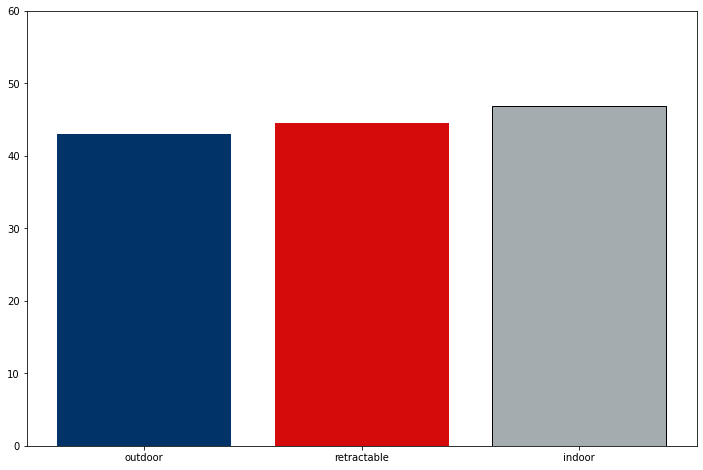

In [23]:
plt.figure(figsize=(12,8))
plt.bar(types[0], df.loc[df.stadium_type == 'outdoor'].score_total.mean(), color='#013369')
plt.bar(types[1], df.loc[df.stadium_type == 'retractable'].score_total.mean(), color='#D50A0A')
plt.bar(types[2], df.loc[df.stadium_type == 'indoor'].score_total.mean(), color='#A5ACAF', edgecolor = "black")
plt.title("")
plt.xlabel('')
plt.ylabel('')
plt.ylim([0, 60])
plt.show()

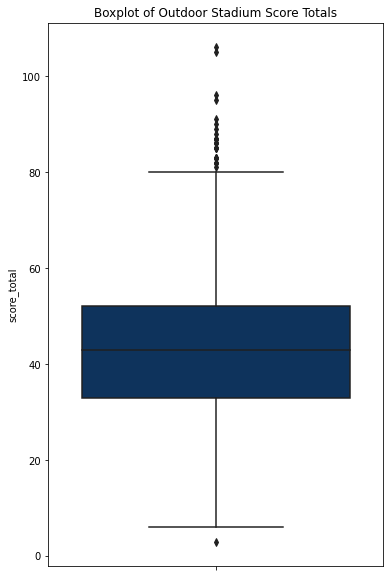

In [14]:
plt.figure(figsize=(6,10))
sns.boxplot(data=df.loc[df.stadium_type == 'outdoor'], y="score_total", color='#013369')
plt.title("Boxplot of Outdoor Stadium Score Totals")
plt.show()

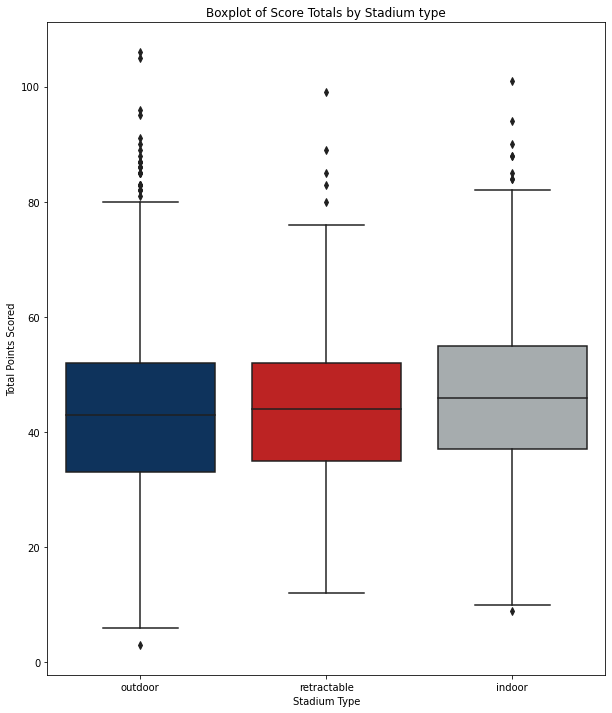

In [25]:
my_pal = {"cold": "##1654C6", "dome": "#A5ACAF", "moderate":"#013369", "warm": "#D50A0A",}
plt.figure(figsize=(10,12))
sns.boxplot(data=df, x="stadium_type", y="score_total", palette=my_pal)
plt.title("Boxplot of Score Totals by Stadium type")
plt.xlabel('Stadium Type')
plt.ylabel('Total Points Scored')
plt.show()

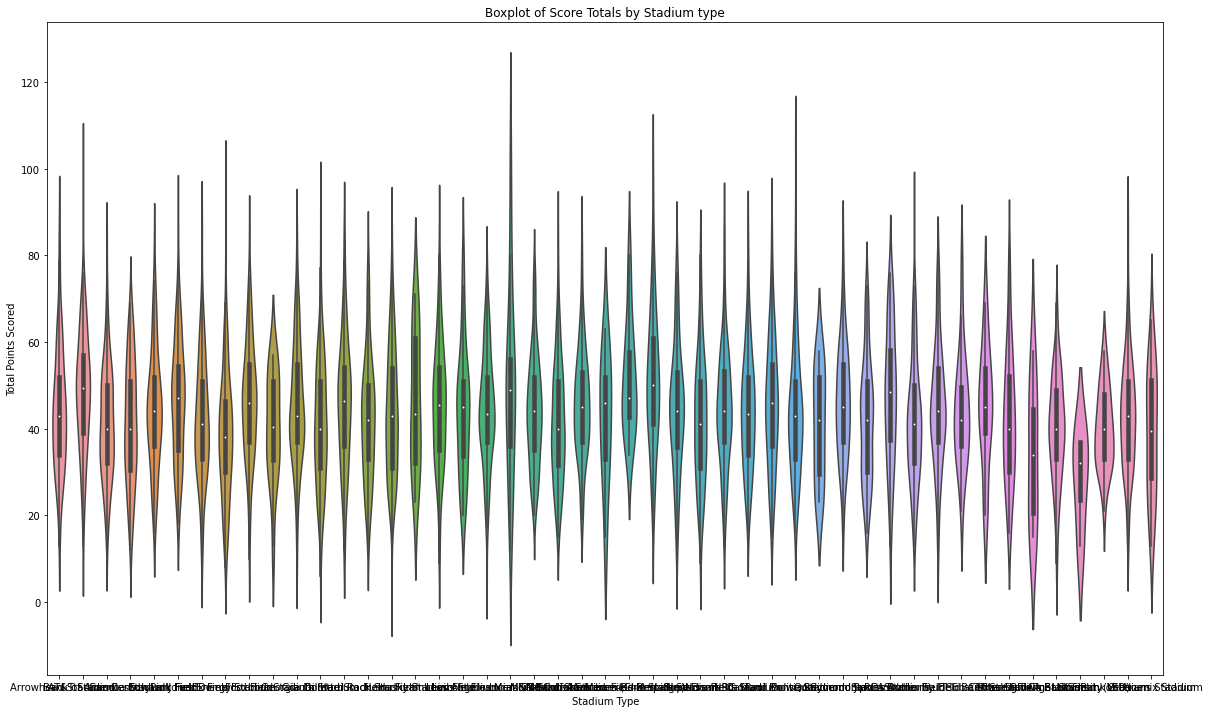

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(20,12))
sns.violinplot(data=df, x="stadium_name", y="score_total")
plt.title("Boxplot of Score Totals by Stadium type")
plt.xlabel('Stadium Type')
plt.ylabel('Total Points Scored')
plt.show()
plt.savefig("test.png")

In [15]:
df.stadium_weather_type.value_counts()

cold        1928
dome        1290
moderate    1186
warm         657
Name: stadium_weather_type, dtype: int64

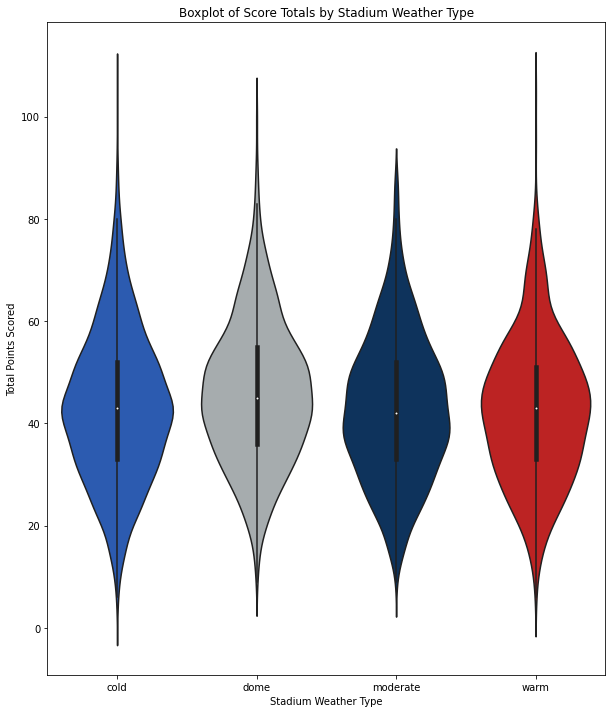

In [19]:
my_pal = {"cold": "#1654C6", "dome": "#A5ACAF", "moderate":"#013369", "warm": "#D50A0A",}
plt.figure(figsize=(10,12))
sns.violinplot(data=df, x="stadium_weather_type", y="score_total", palette=my_pal)
plt.title("Boxplot of Score Totals by Stadium Weather Type")
plt.xlabel('Stadium Weather Type')
plt.ylabel('Total Points Scored')
plt.show()